In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
%matplotlib inline

#### Ploting Sigmoid

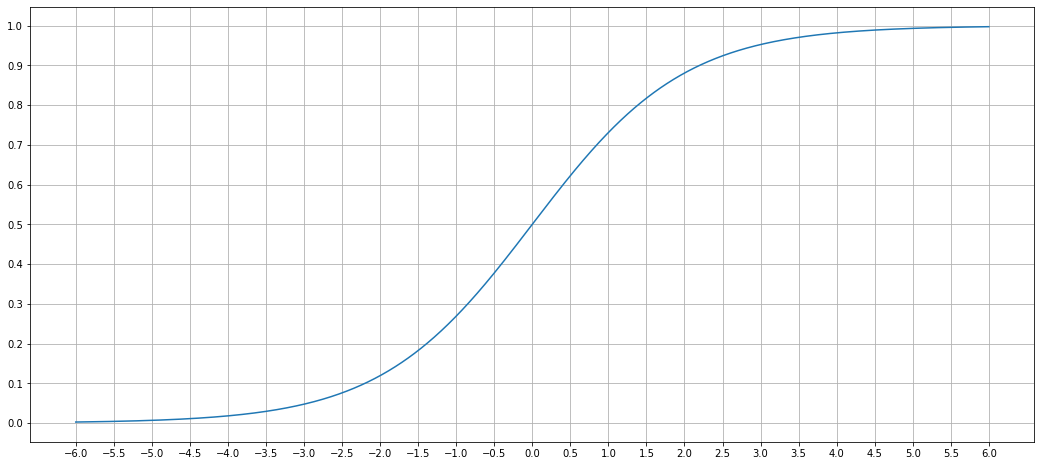

In [5]:
x = np.linspace(-6,6, 2000)
y = 1.0/(1.0 + np.exp(-1*x) )
plt.figure(figsize=(18,8))
plt.plot(x,y)
plt.xticks(np.arange(-6,6.01,0.5))
plt.yticks(np.arange(0,1.01,0.1))
plt.grid()

In [ ]:
# difficulties = np.random.random(size=10000)*6.0 - 3.0
difficulties = np.linspace(-3.0, 3.0, 10000)
iq = np.sort(np.random.random(size=100)*6.0 - 3.0)
print(np.max(iq), np.min(iq))
print(np.min(difficulties) , np.max(difficulties))

2.9875639774289198 -2.869262269984774
-3.0 3.0


(array([13.,  8., 11., 12., 13.,  9.,  9.,  7.,  6., 12.]),
 array([-2.86926227, -2.28357965, -1.69789702, -1.1122144 , -0.52653177,
         0.05915085,  0.64483348,  1.2305161 ,  1.81619873,  2.40188135,
         2.98756398]),
 <a list of 10 Patch objects>)

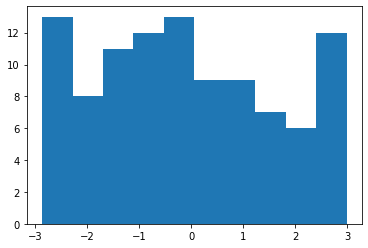

In [ ]:
plt.hist(iq)

diff : (100, 10000)
probab : (100, 10000)
total_prob : (100,)


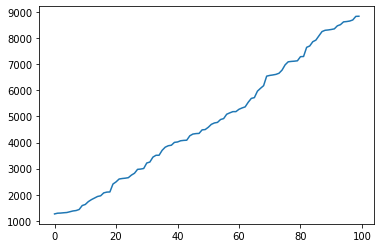

In [ ]:
diff = -1.0 * ( difficulties.reshape((1,10000)) - iq.reshape((100,1)) )
print(f"diff : {diff.shape}")
probab = 1.0/(1.0+np.exp(-1.0*diff))
print(f"probab : {probab.shape}")
total_prob = np.sum(probab, axis=-1)
print(f"total_prob : {total_prob.shape}")
plt.plot(np.arange(100), total_prob)

In [ ]:
print(f"Min score by a student : {total_prob[0]}, Max scrore : {total_prob[-1]}")

Min score by a student : 1160.292254219125, Max scrore : 8801.237767484292


 question_scores.shape : (10000,) 
Max score for a question: 87.65455875260534 , min score for a q : 10.584840268032911


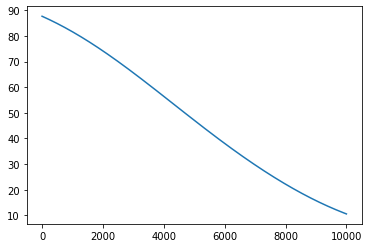

In [ ]:
question_scores = np.sum(probab, axis=0)
print(f" question_scores.shape : {question_scores.shape} ")
assert np.max(question_scores) == question_scores[0]
assert np.min(question_scores) == question_scores[-1]
print(f"Max score for a question: {question_scores[0]} , min score for a q : {question_scores[-1]}")
plt.plot(np.arange(10000),question_scores)

### Start simulation

In [ ]:
cheater = random.choice(range(100))
print(f"cheater : {cheater}")
qns = np.arange(10000)
np.random.shuffle(qns)
probab[cheater][qns[:5000]] = 1
print(probab[cheater])

cheater : 13
[0.68594719 1.         0.6856886  ... 0.00539131 0.0053881  0.00538488]


#### Score in tough 500 quetions

tough_500_scores : (100,)
tough_500_scores[cheater] : 236.66485668818245


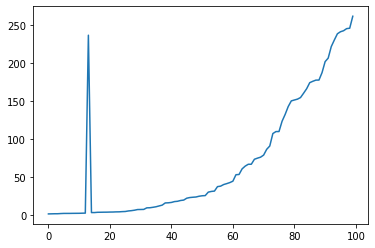

In [ ]:
tough_500_scores = np.sum(probab[:,-500:], axis = 1)
print(f"tough_500_scores : {tough_500_scores.shape}")
print(f"tough_500_scores[cheater] : {tough_500_scores[cheater]}")
plt.plot(np.arange(100), tough_500_scores   )

In [ ]:
top_n_scores = np.argsort(tough_500_scores)[-10:]
print(f"Top 5 scores : {top_n_scores} scores: {tough_500_scores[top_n_scores]}")

Top 5 scores : [91 92 93 13 94 95 96 97 98 99] scores: [206.50732552 221.65754308 230.37217049 236.66485669 238.54991267
 241.21962123 242.55526516 245.31305014 245.84743085 261.62231798]


#### Score in easiest 500 questions

easy_500_scores : (100,)
easy_500_scores[cheater] : 412.11797402807747


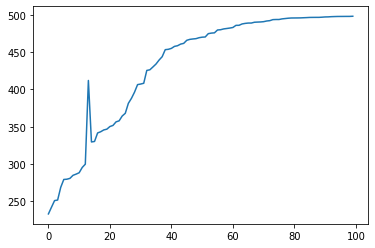

In [ ]:
easy_500_scores = np.sum(probab[:,:500], axis = 1)
print(f"easy_500_scores : {easy_500_scores.shape}")
print(f"easy_500_scores[cheater] : {easy_500_scores[cheater]}")
plt.plot(np.arange(100), easy_500_scores   )

In [ ]:
easy_500_scores[top_n_scores]

array([497.62462015, 497.90051853, 498.04287697, 412.11797403,
       498.1670578 , 498.20578461, 498.2248412 , 498.2635353 ,
       498.27093323, 498.47576888])

In [ ]:
detected_cheater = top_n_scores[np.argmin(easy_500_scores[top_n_scores])]
print(f"detected_cheater : {detected_cheater}")

detected_cheater : 13


In [ ]:
def simulation():
    # difficulties = np.random.random(size=10000)*6.0 - 3.0
    difficulties = np.linspace(-3.0, 3.0, 10000)
    iq = np.sort(np.random.random(size=100)*6.0 - 3.0)
    diff = -1.0 * ( difficulties.reshape((1,10000)) - iq.reshape((100,1)) )
    probab = 1.0/(1.0+np.exp(-1.0*diff))
    assert probab.shape == (100, 10000)

    cheater = random.choice(range(100))

    qns = np.arange(10000)
    np.random.shuffle(qns)
    probab[cheater][qns[:5000]] = 1.0

    tough_n_scores = np.sum(probab[:,-500:], axis = 1)
    top_n_scorers = np.argsort(tough_n_scores)[-10:]

    easy_n_scores = np.sum(probab[:,:500], axis = 1)
    detected_cheater = top_n_scorers[np.argmin(easy_n_scores[top_n_scorers])]

    return detected_cheater == cheater

count = 0
for i in tqdm(range(100)):
    if simulation():
        count +=1 

print(f"# of times correct : {count}")



100%|██████████| 100/100 [00:02<00:00, 36.43it/s]

# of times correct : 77


In [ ]:
def simulation_new():

    difficulties = np.random.random(size=10000)*6.0 - 3.0
    iq = np.sort(np.random.random(size=100)*6.0 - 3.0)
    diff = -1.0 * ( difficulties.reshape((1,10000)) - iq.reshape((100,1)) )
    probab = 1.0/(1.0+np.exp(-1.0*diff))
    assert probab.shape == (100, 10000)

    cheater = random.choice(range(100))

    probab[probab>=0.50] = 1
    probab[probab<0.50] = 0

    qns = np.arange(10000)
    np.random.shuffle(qns)
    probab[cheater][qns[:5000]] = 1
    
    x = probab.astype(np.bool)

    per_question = x.mean(0)
    # print(f"per_question {per_question.shape}")
    correct = np.array([per_question[x[i]].mean() for i in range(100)])
    wrong = np.array([per_question[~x[i]].mean() for i in range(100)])
    detected_cheater = np.argmin(correct - wrong)
    return detected_cheater == cheater

count = 0
for i in tqdm(range(100)):
    if simulation_new():
        count +=1 

print(f"\n # of times correct : {count}")

 76%|███████▌  | 76/100 [00:04<00:01, 16.85it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 100/100 [00:05<00:00, 17.33it/s]


 # of times correct : 89
